# Tugas 1 ML (K Means Clustering)
- Nama: Andika Rahman Teja
- NRP : 5025221022

Link : https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from Emilia_KMeans import Emilia_KMeans # Library From Scratch

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# EDA Time

Pada bagian ini, saya hanya melakukan EDA dan visualisasi yang relevan dan mungkin bisa mendapatkan sebuah *insight* dari data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

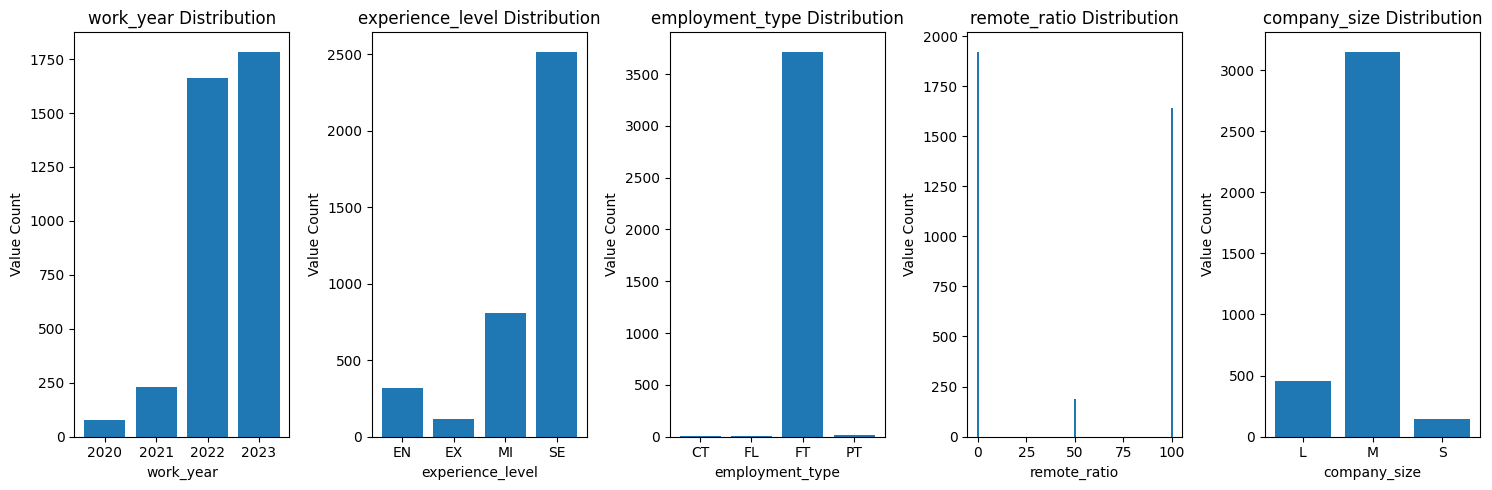

In [5]:
#bar plot
plt.figure(figsize=(15, 5))

col = ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']
for i in range(5):
    plt.subplot(150 + i + 1)
    var = df[col[i]].value_counts().sort_index()
    plt.bar(var.index, var.values)
    plt.xlabel(col[i])
    plt.ylabel("Value Count")
    plt.title(f'{col[i]} Distribution')

plt.tight_layout()
plt.show()

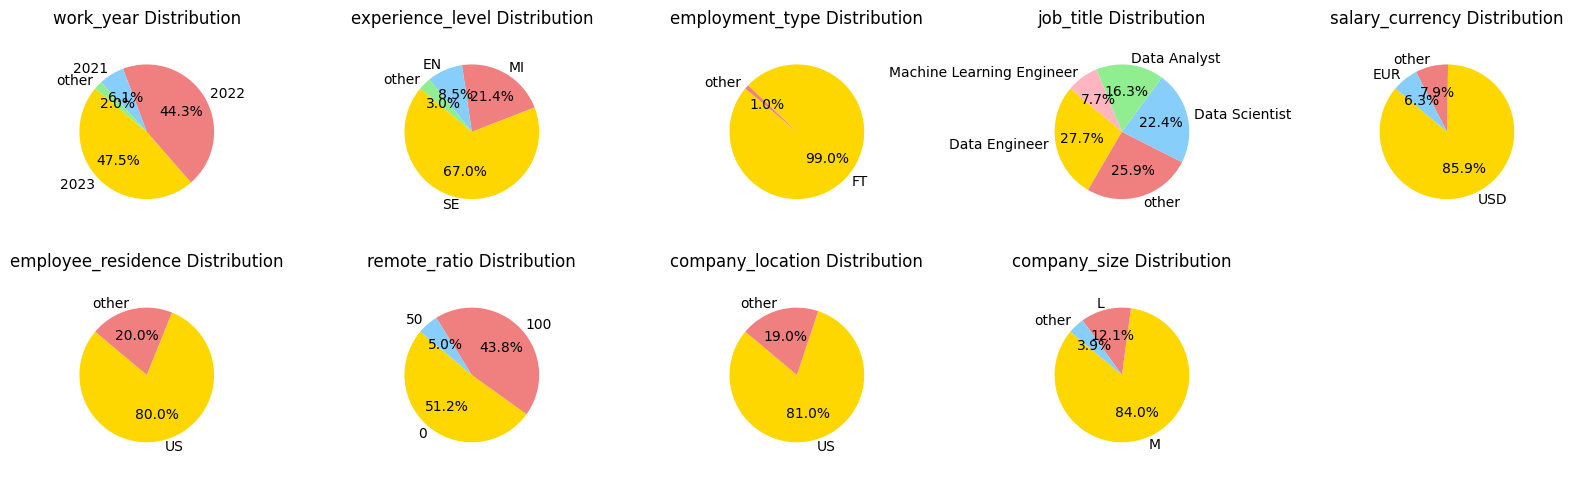

In [6]:
#pie chart
plt.figure(figsize=(15, 5))

df_pie = df.drop(columns = ['salary', 'salary_in_usd'])

percentage_threshold = 5
total_rows = len(df_pie)

for col in df_pie.columns:
    value_counts = df_pie[col].value_counts()
    df_pie[col] = df_pie[col].apply(lambda x: 'other' if (value_counts[x] / total_rows) * 100 < percentage_threshold else x)

col = df_pie.columns
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']

for i in range(len(col)):
    plt.subplot(250 + i + 1)
    var = df_pie[col[i]].value_counts()
    plt.pie(var, labels=var.index, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.axis('equal')
    plt.title(f'{col[i]} Distribution')

plt.tight_layout()
plt.show()

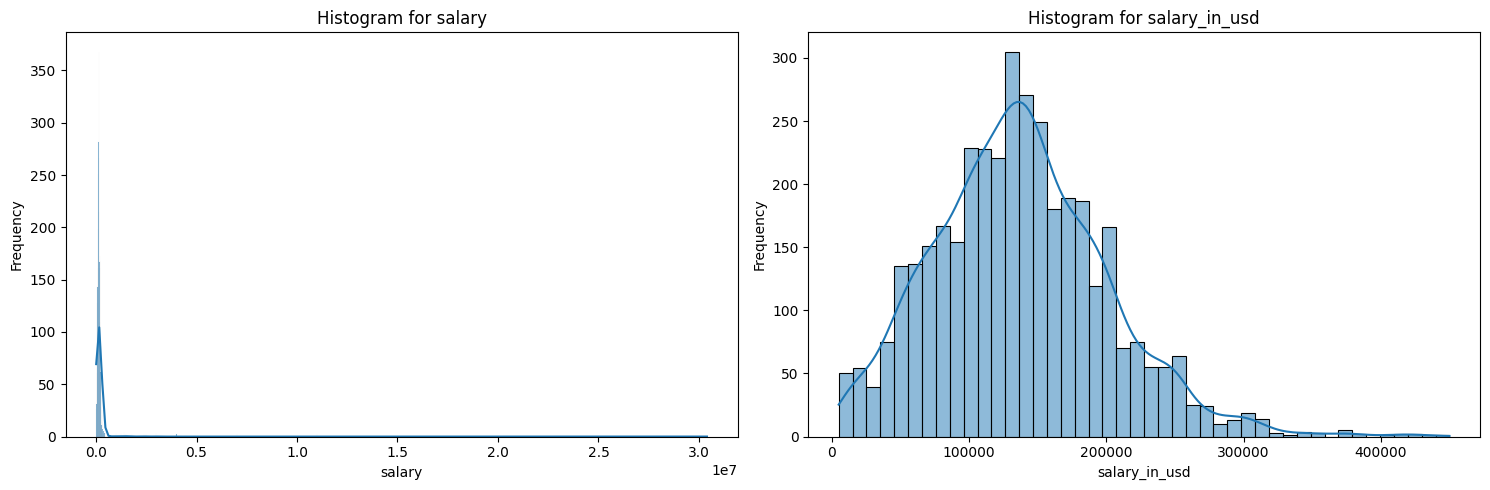

In [7]:
# Scatter Plot
kolom = ['salary', 'salary_in_usd']

plt.figure(figsize=(15,5))

for i, kolom in enumerate (kolom):
    plt.subplot (1, 2, i+1)
    sns.histplot(df[kolom],kde = True)
    plt.title(f'Histogram for {kolom}')
    plt.xlabel(kolom)
    plt.ylabel('Frequency')


plt.tight_layout()

plt.show()

# K Means Clustering
Di sini saya akan melakukan Clustering antara:
- Experience Level - Salary in USD
- Company Size - Salary Size
- Job Title - Salary in USD

Alasan saya melakukan clustering pada dua hal tersebut adalah:
1. *Salary in USD* saya gunakan sebagai nilai y karena nilainya yang lebih tersebar merata jika dibandingkan *salary*
2. Harapannya, cluster dapat memisahkan tingkatan level pengalaman, skala perusahaan, dan jenis pekerjaan terhadap gaji dalam mata uang Dollar Amerika Serikat.

In [8]:
label_encoder = preprocessing.LabelEncoder()
df['exp_lvl_encoding'] = label_encoder.fit_transform(df['experience_level'])
df['comp_size_encoding'] = label_encoder.fit_transform(df['company_size'])
df['job_title_encoding'] = label_encoder.fit_transform(df['job_title'])
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,exp_lvl_encoding,comp_size_encoding,job_title_encoding
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,3,0,84
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,2,2,66
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,2,2,66
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,3,1,47
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,3,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,3,0,47
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,2,0,84
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,0,2,47
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,0,0,17


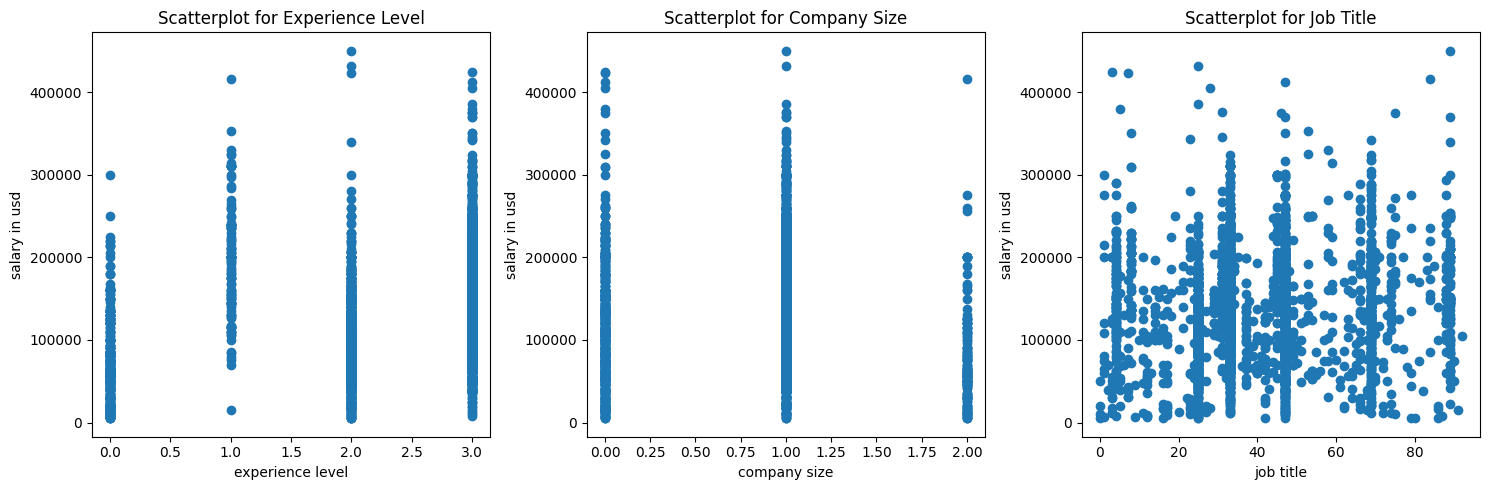

In [9]:
# scatter plot data train

df_train_1 = df[['exp_lvl_encoding', 'salary_in_usd']]
df_train_2 = df[['comp_size_encoding', 'salary_in_usd']]
df_train_3 = df[['job_title_encoding', 'salary_in_usd']]

plt.figure(figsize=(15,5))

plt.subplot (1, 3, 1)
plt.scatter(df_train_1['exp_lvl_encoding'], df_train_1['salary_in_usd'])
plt.title('Scatterplot for Experience Level')
plt.xlabel('experience level')
plt.ylabel('salary in usd')

plt.subplot (1, 3, 2)
plt.scatter(df_train_2['comp_size_encoding'], df_train_2['salary_in_usd'])
plt.title('Scatterplot for Company Size')
plt.xlabel('company size')
plt.ylabel('salary in usd')

plt.subplot (1, 3, 3)
plt.scatter(df_train_3['job_title_encoding'], df_train_3['salary_in_usd'])
plt.title('Scatterplot for Job Title')
plt.xlabel('job title')
plt.ylabel('salary in usd')

plt.tight_layout()
plt.show()

# Experience Level - Salary in USD

In [64]:
data_train_1 = df_train_1.values

In [65]:
wcss_1 = []
scores_1 = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto', random_state=42)
    km.fit(data_train_1)
    wcss_1.append(km.inertia_)

    labels_1 = km.labels_
    silhouette_avg_1 = silhouette_score(data_train_1, labels_1)
    scores_1.append(silhouette_avg_1)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss_1))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg_1))

wcss score for n_cluster = 2 is [5838641711868.289]
silhoutte score for n_clusters = 2 is 0.5436983734043207
wcss score for n_cluster = 3 is [5838641711868.289, 3007814765640.6543]
silhoutte score for n_clusters = 3 is 0.536144418197247
wcss score for n_cluster = 4 is [5838641711868.289, 3007814765640.6543, 1827006856631.516]
silhoutte score for n_clusters = 4 is 0.5342765417122655
wcss score for n_cluster = 5 is [5838641711868.289, 3007814765640.6543, 1827006856631.516, 1259076973540.3386]
silhoutte score for n_clusters = 5 is 0.538752889516414
wcss score for n_cluster = 6 is [5838641711868.289, 3007814765640.6543, 1827006856631.516, 1259076973540.3386, 893713686890.7847]
silhoutte score for n_clusters = 6 is 0.5373545088269932
wcss score for n_cluster = 7 is [5838641711868.289, 3007814765640.6543, 1827006856631.516, 1259076973540.3386, 893713686890.7847, 765121420756.2776]
silhoutte score for n_clusters = 7 is 0.5217309148438469
wcss score for n_cluster = 8 is [5838641711868.289, 300

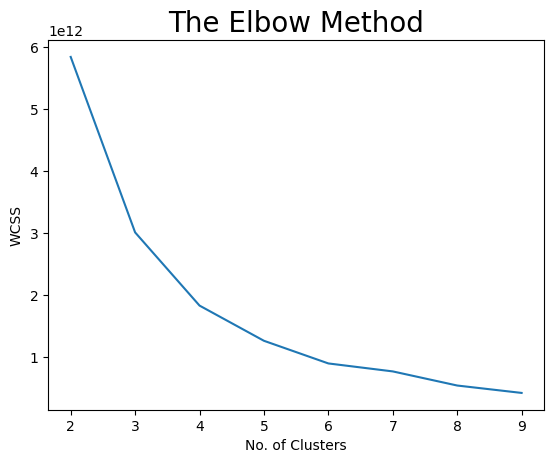

In [66]:
# Visualizing Elbow Method
plt.plot(range(2, 10), wcss_1)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

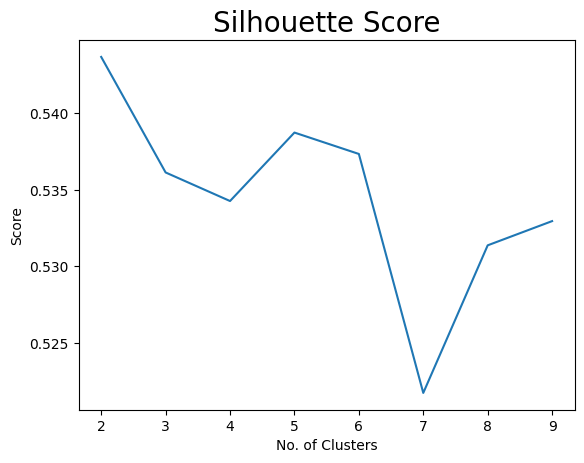

In [67]:
# Visualizing Silhouette Score
plt.plot(range(2, 10), scores_1)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

Sesuai pertimbangan [Elbow Method](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/) dan [Silhouette Score](https://tushar-joshi-89.medium.com/silhouette-score-a9f7d8d78f29#:~:text=Silhouette%20Score%20is%20a%20metric,our%20clustering%20algorithm%20has%20performed.), maka saya akan mengambil banyak cluster = 4

In [14]:
# Model Build
kmeansmodel = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 'auto', random_state = 42)
y_kmeans_1= kmeansmodel.fit_predict(data_train_1)

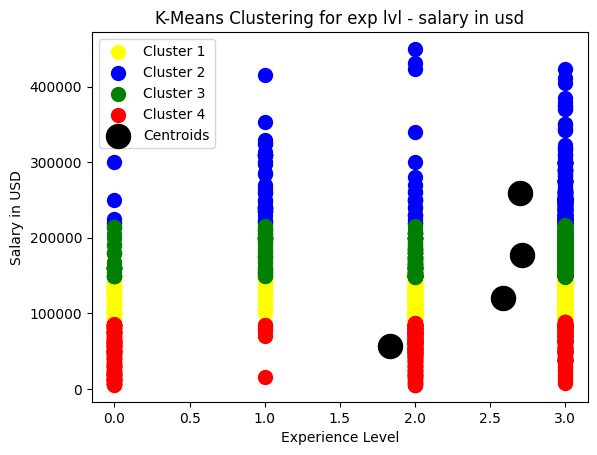

In [15]:
# Visualisasi cluster menggunakan scatter plot
plt.scatter(data_train_1[y_kmeans_1 == 0, 0], data_train_1[y_kmeans_1 == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(data_train_1[y_kmeans_1 == 1, 0], data_train_1[y_kmeans_1 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_train_1[y_kmeans_1 == 2, 0], data_train_1[y_kmeans_1 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_train_1[y_kmeans_1 == 3, 0], data_train_1[y_kmeans_1 == 3, 1], s = 100, c = 'red', label = 'Cluster 4')

# Menampilkan pusat cluster
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('K-Means Clustering for exp lvl - salary in usd')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.legend()
plt.show()

Dari clustering di atas, maka dapat diperoleh 4 cluster pendapatan:
- Pendapatan rendah (warna merah)
- Pendapatan menengah rendah (warna kuning)
- Pendapatan menengah tinggi (warna hijau)
- Pendapatan tinggi (warna biru)

# Company size & Salary in USD

In [16]:
data_train_2 = df_train_2.values

In [68]:
wcss_2 = []
scores_2 = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto', random_state=42)
    km.fit(data_train_2)
    wcss_2.append(km.inertia_)

    labels_2 = km.labels_
    silhouette_avg_2 = silhouette_score(data_train_2, labels_2)
    scores_2.append(silhouette_avg_2)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss_2))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg_2))

wcss score for n_cluster = 2 is [5838641709510.233]
silhoutte score for n_clusters = 2 is 0.5436984584384763
wcss score for n_cluster = 3 is [5838641709510.233, 3007814763471.4937]
silhoutte score for n_clusters = 3 is 0.536144570139153
wcss score for n_cluster = 4 is [5838641709510.233, 3007814763471.4937, 1827006854568.1594]
silhoutte score for n_clusters = 4 is 0.5342768045482833
wcss score for n_cluster = 5 is [5838641709510.233, 3007814763471.4937, 1827006854568.1594, 1259076971497.1396]
silhoutte score for n_clusters = 5 is 0.5387532489188496
wcss score for n_cluster = 6 is [5838641709510.233, 3007814763471.4937, 1827006854568.1594, 1259076971497.1396, 893713684850.1403]
silhoutte score for n_clusters = 6 is 0.5373549590879431
wcss score for n_cluster = 7 is [5838641709510.233, 3007814763471.4937, 1827006854568.1594, 1259076971497.1396, 893713684850.1403, 765121418714.4243]
silhoutte score for n_clusters = 7 is 0.5217314236747665
wcss score for n_cluster = 8 is [5838641709510.233

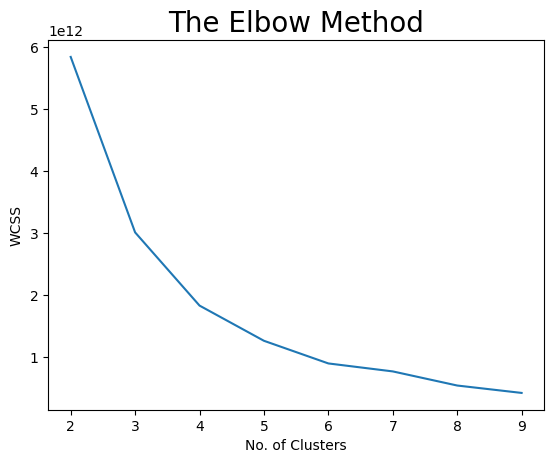

In [70]:
# Visualizing Elbow Method
plt.plot(range(2, 10), wcss_2)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

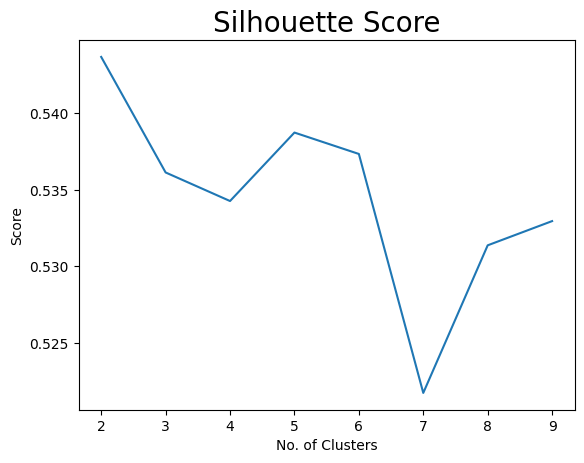

In [71]:
# Visualizing Silhouette Score
plt.plot(range(2, 10), scores_2)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

Sesuai pertimbangan [Elbow Method](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/) dan [Silhouette Score](https://tushar-joshi-89.medium.com/silhouette-score-a9f7d8d78f29#:~:text=Silhouette%20Score%20is%20a%20metric,our%20clustering%20algorithm%20has%20performed.), maka saya akan mengambil banyak cluster = 4

In [20]:
# Model Build
kmeansmodel = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 'auto', random_state = 42)
y_kmeans_2= kmeansmodel.fit_predict(data_train_2)

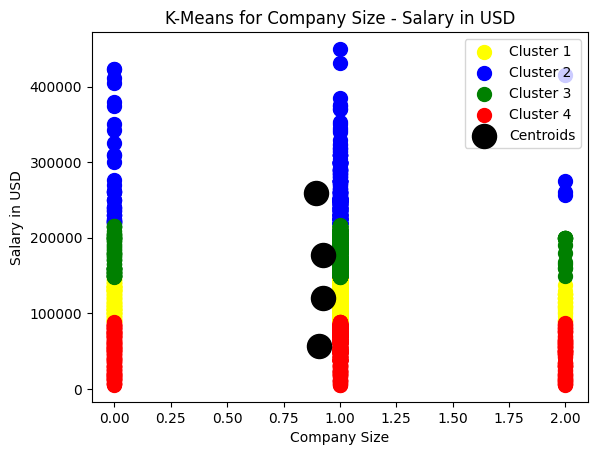

In [21]:
# Visualisasi cluster menggunakan scatter plot
plt.scatter(data_train_2[y_kmeans_2 == 0, 0], data_train_2[y_kmeans_2 == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(data_train_2[y_kmeans_2 == 1, 0], data_train_2[y_kmeans_2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_train_2[y_kmeans_2 == 2, 0], data_train_2[y_kmeans_2 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_train_2[y_kmeans_2 == 3, 0], data_train_2[y_kmeans_2 == 3, 1], s = 100, c = 'red', label = 'Cluster 4')

# Menampilkan pusat cluster
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('K-Means for Company Size - Salary in USD')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.legend()
plt.show()

Dari clustering di atas, maka dapat diperoleh 4 cluster pendapatan:
- Pendapatan rendah (warna merah)
- Pendapatan menengah rendah (warna kuning)
- Pendapatan menengah tinggi (warna hijau)
- Pendapatan tinggi (warna biru)

# Job Title - Salary in USD

In [22]:
data_train_3 = df_train_3.values

In [72]:
wcss_3 = []
scores_3 = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto', random_state=42)
    km.fit(data_train_3)
    wcss_3.append(km.inertia_)

    labels_3 = km.labels_
    silhouette_avg_3 = silhouette_score(data_train_3, labels_3)
    scores_3.append(silhouette_avg_3)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss_3))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg_3))

wcss score for n_cluster = 2 is [5838642985272.633]
silhoutte score for n_clusters = 2 is 0.5436952334111164
wcss score for n_cluster = 3 is [5838642985272.633, 3007816032190.115]
silhoutte score for n_clusters = 3 is 0.5361385129752829
wcss score for n_cluster = 4 is [5838642985272.633, 3007816032190.115, 1827008124850.6387]
silhoutte score for n_clusters = 4 is 0.5342671940978181
wcss score for n_cluster = 5 is [5838642985272.633, 3007816032190.115, 1827008124850.6387, 1259078235967.6812]
silhoutte score for n_clusters = 5 is 0.5387398129903803
wcss score for n_cluster = 6 is [5838642985272.633, 3007816032190.115, 1827008124850.6387, 1259078235967.6812, 893714952460.7622]
silhoutte score for n_clusters = 6 is 0.537338670057576
wcss score for n_cluster = 7 is [5838642985272.633, 3007816032190.115, 1827008124850.6387, 1259078235967.6812, 893714952460.7622, 765122684119.8678]
silhoutte score for n_clusters = 7 is 0.5217116180254041
wcss score for n_cluster = 8 is [5838642985272.633, 300

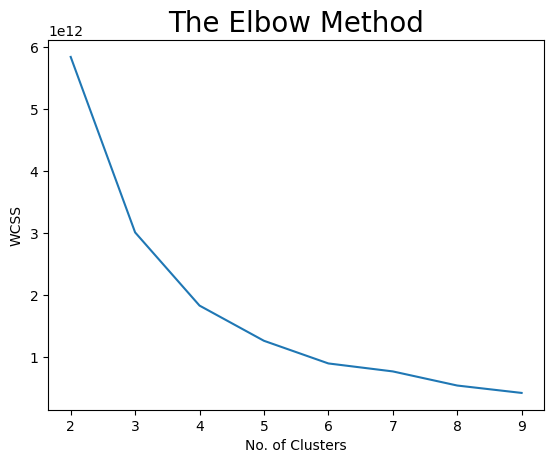

In [73]:
# Visualizing Elbow Method
plt.plot(range(2, 10), wcss_3)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

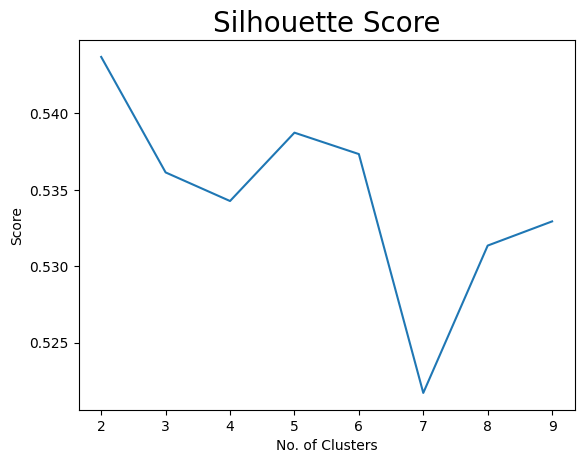

In [74]:
# Visualizing Silhouette Score
plt.plot(range(2, 10), scores_3)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

Ini keputusan yang sulit karena ada beberapa kondisi tidak sinkron antara Silhouette Score dengan Elbow Method. Saya akhirnya memutuskan menggunakan 5 Cluster

In [26]:
# Model Build
kmeansmodel = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 'auto', random_state = 42)
y_kmeans_3= kmeansmodel.fit_predict(data_train_3)

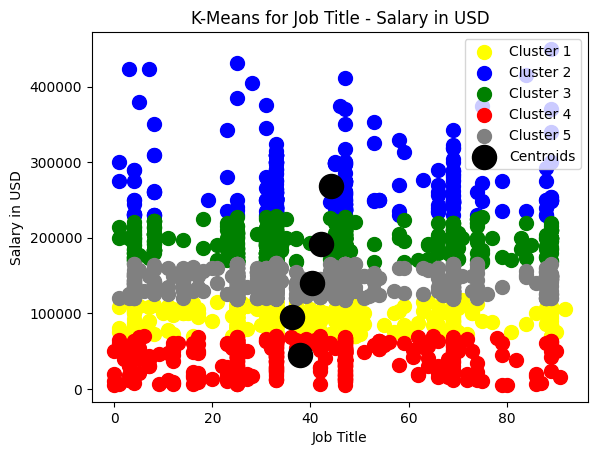

In [29]:
# Visualisasi cluster menggunakan scatter plot
plt.scatter(data_train_3[y_kmeans_3 == 0, 0], data_train_3[y_kmeans_3 == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(data_train_3[y_kmeans_3 == 1, 0], data_train_3[y_kmeans_3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_train_3[y_kmeans_3 == 2, 0], data_train_3[y_kmeans_3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_train_3[y_kmeans_3 == 3, 0], data_train_3[y_kmeans_3 == 3, 1], s = 100, c = 'red', label = 'Cluster 4')
plt.scatter(data_train_3[y_kmeans_3 == 4, 0], data_train_3[y_kmeans_3 == 4, 1], s = 100, c = 'gray', label = 'Cluster 5')

# Menampilkan pusat cluster
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('K-Means for Job Title - Salary in USD')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.legend()
plt.show()

Dari clustering di atas, maka dapat diperoleh 4 cluster pendapatan:
- Pendapatan rendah (warna merah)
- Pendapatan menengah bawah (warna kuning)
- Pendapatan menengah (warna abu-abu)
- Pendapatan menengah atas (warna hijau)
- Pendapatan tinggi (warna biru)

# Emilia K Means

Ini adalah model K Means Clustering buatan saya sendiri yang saya buat *from scratch*. Mungkin masih banyak kekurangan pada model saya mengingat batas waktu tugas hanya 1 minggu. Disini saya hanya akan mengambil satu contoh clustering, yakni **Job Title - Salary in USD**

In [31]:
data_train_3

array([[    84,  85847],
       [    66,  30000],
       [    66,  25500],
       ...,
       [    47, 105000],
       [    17, 100000],
       [    45,  94665]])

In [32]:
wcss = []
scores = []
for i in range(2, 10):
    km = Emilia_KMeans(t_cluster = i, type_cent = 'random', t_init = 10, max_iter = 300)
    labels = km.fit(data_train_3)
    wcss.append(km.inertia_(data_train_3))

    silhouette_avg = silhouette_score(data_train_3, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [9530362123107.072]
silhoutte score for n_clusters = 2 is 0.6500665778961385
wcss score for n_cluster = 3 is [9530362123107.072, 53370147805770.06]
silhoutte score for n_clusters = 3 is 0.6500665778961385
wcss score for n_cluster = 4 is [9530362123107.072, 53370147805770.06, 10305979348006.855]
silhoutte score for n_clusters = 4 is 0.6500665778961385
wcss score for n_cluster = 5 is [9530362123107.072, 53370147805770.06, 10305979348006.855, 6609475819285.809]
silhoutte score for n_clusters = 5 is 0.6500665778961385
wcss score for n_cluster = 6 is [9530362123107.072, 53370147805770.06, 10305979348006.855, 6609475819285.809, 7917430603844.662]
silhoutte score for n_clusters = 6 is 0.6500665778961385
wcss score for n_cluster = 7 is [9530362123107.072, 53370147805770.06, 10305979348006.855, 6609475819285.809, 7917430603844.662, 2538450771669.992]
silhoutte score for n_clusters = 7 is 0.6500665778961385
wcss score for n_cluster = 8 is [9530362123107.072, 53370

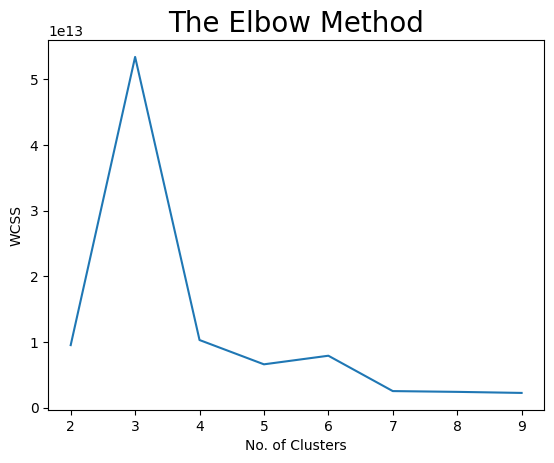

In [33]:
# Visualizing Elbow Method
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

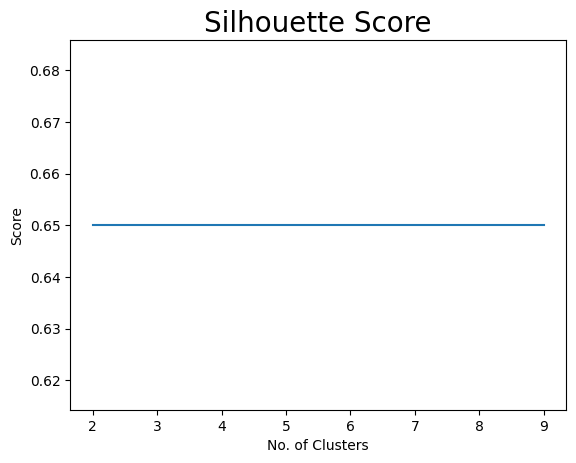

In [34]:
# Visualizing Silhouette Score
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

Karena code masih belum optimal sehingga nilai Silhouette Score masih stagnan. Saya memutuskan menggunakan 4 cluster untuk contoh ini

In [62]:
km = Emilia_KMeans(t_cluster = 4, type_cent = 'random', t_init = 10, max_iter = 300000)
labels = km.fit(data_train_3)
centroids = km.centroid

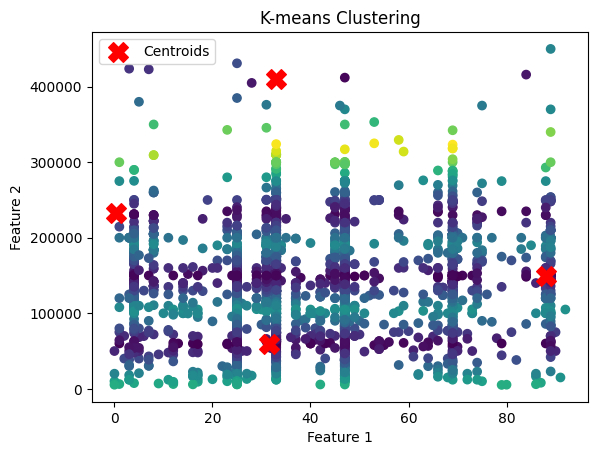

In [63]:
# Create a scatter plot
plt.scatter(data_train_3[:, 0], data_train_3[:, 1],c =labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Sekian Terimakasih 😀